# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict the type of traffic sign. You are provided with a dataset of traffic sign images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing)
### **Dataset Name:** Traffic Signs

### **Description:**  
The dataset contains images of various German traffic signs labeled for classification purposes. Each image belongs to one of the 43 classes, representing different types of traffic signs.

### **Labels:**
```python
classes = {
    0:  'Speed limit (20km/h)',
    1:  'Speed limit (30km/h)',
    2:  'Speed limit (50km/h)',
    3:  'Speed limit (60km/h)',
    4:  'Speed limit (70km/h)',
    5:  'Speed limit (80km/h)',
    6:  'End of speed limit (80km/h)',
    7:  'Speed limit (100km/h)',
    8:  'Speed limit (120km/h)',
    9:  'No passing',
    10: 'No passing veh over 3.5 tons',
    11: 'Right-of-way at intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Veh > 3.5 tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve left',
    20: 'Dangerous curve right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End speed + passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End no passing veh > 3.5 tons'
}
```



## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing).

In [3]:
#https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing
!pip install gdown
!gdown --id 1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ
!unzip Traffic_Signs.zip

Streaming output truncated to the last 5000 lines.
 extracting: Traffic_Signs/Dataset/13/00013_00004_00022.png  
  inflating: Traffic_Signs/Dataset/13/00013_00021_00029.png  
  inflating: Traffic_Signs/Dataset/13/00013_00003_00023.png  
 extracting: Traffic_Signs/Dataset/13/00013_00063_00007.png  
 extracting: Traffic_Signs/Dataset/13/00013_00034_00029.png  
  inflating: Traffic_Signs/Dataset/13/00013_00045_00013.png  
  inflating: Traffic_Signs/Dataset/13/00013_00068_00019.png  
 extracting: Traffic_Signs/Dataset/13/00013_00003_00004.png  
 extracting: Traffic_Signs/Dataset/13/00013_00017_00010.png  
 extracting: Traffic_Signs/Dataset/13/00013_00046_00003.png  
  inflating: Traffic_Signs/Dataset/13/00013_00057_00008.png  
 extracting: Traffic_Signs/Dataset/13/00013_00058_00011.png  
 extracting: Traffic_Signs/Dataset/13/00013_00063_00017.png  
 extracting: Traffic_Signs/Dataset/13/00013_00002_00013.png  
 extracting: Traffic_Signs/Dataset/13/00013_00002_00006.png  
  inflating: Traffi

In [4]:
!py unzip Traffic_Signs.zip

/bin/bash: line 1: py: command not found


## Import Libraries

In [2]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [5]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import keras_tuner as kt
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [6]:
classes = {
    0:  'Speed limit (20km/h)',
    1:  'Speed limit (30km/h)',
    2:  'Speed limit (50km/h)',
    3:  'Speed limit (60km/h)',
    4:  'Speed limit (70km/h)',
    5:  'Speed limit (80km/h)',
    6:  'End of speed limit (80km/h)',
    7:  'Speed limit (100km/h)',
    8:  'Speed limit (120km/h)',
    9:  'No passing',
    10: 'No passing veh over 3.5 tons',
    11: 'Right-of-way at intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Veh > 3.5 tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve left',
    20: 'Dangerous curve right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End speed + passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End no passing veh > 3.5 tons'
}

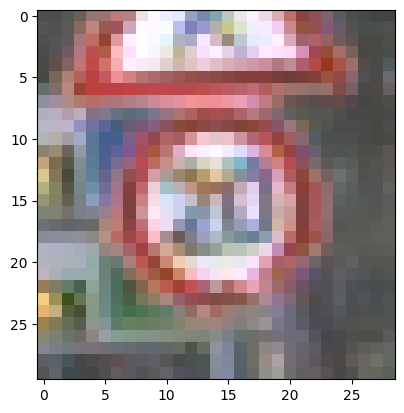

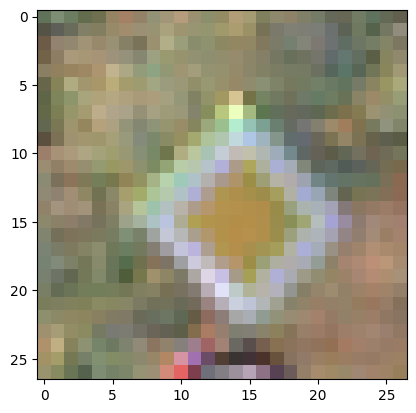

In [7]:


plt.imshow(plt.imread(r'/content/Traffic_Signs/Dataset/0/00000_00000_00000.png'))
plt.show()

plt.imshow(plt.imread(r'/content/Traffic_Signs/Dataset/12/00012_00000_00000.png'))
plt.show()


In [23]:
import os

i = 0
for cals in classes:
  old_name = '/content/Traffic_Signs/Dataset/' + str(i)
  new_name = '/content/Traffic_Signs/Dataset/' + str(classes[cals])

  if os.path.exists(old_name):
    os.renames(old_name, new_name)
  else:
    print("Directory not found:", old_name)

  i += 1

Directory not found: /content/Traffic_Signs/Dataset/0
Directory not found: /content/Traffic_Signs/Dataset/1
Directory not found: /content/Traffic_Signs/Dataset/2
Directory not found: /content/Traffic_Signs/Dataset/3
Directory not found: /content/Traffic_Signs/Dataset/4
Directory not found: /content/Traffic_Signs/Dataset/5
Directory not found: /content/Traffic_Signs/Dataset/6
Directory not found: /content/Traffic_Signs/Dataset/7
Directory not found: /content/Traffic_Signs/Dataset/8
Directory not found: /content/Traffic_Signs/Dataset/9
Directory not found: /content/Traffic_Signs/Dataset/10
Directory not found: /content/Traffic_Signs/Dataset/11
Directory not found: /content/Traffic_Signs/Dataset/12
Directory not found: /content/Traffic_Signs/Dataset/13
Directory not found: /content/Traffic_Signs/Dataset/14
Directory not found: /content/Traffic_Signs/Dataset/15
Directory not found: /content/Traffic_Signs/Dataset/16
Directory not found: /content/Traffic_Signs/Dataset/17
Directory not found:

## Data Splitting
In this section, we will split our dataset into three parts:

* Training set (70%).
* Validation set (15%).
* Test set (15%).

In [31]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory('/content/Traffic_Signs/Dataset', target_size=(224, 224), batch_size=32, class_mode='categorical', subset='training')
validation_generator = datagen.flow_from_directory('/content/Traffic_Signs/Dataset', target_size=(224, 224), batch_size=32, class_mode='categorical', subset='validation')


Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


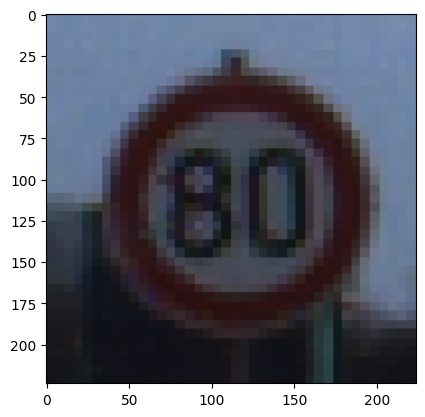

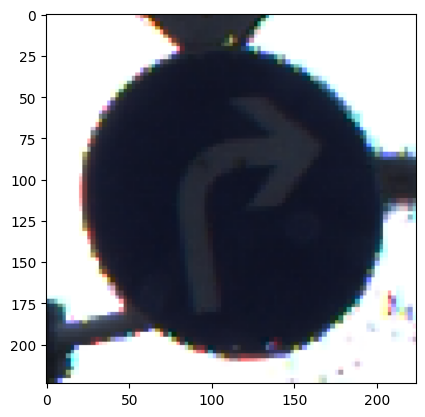

In [32]:
plt.imshow(train_generator[0][0][0])
plt.show()
plt.imshow(train_generator[0][0][9])
plt.show()

## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(43, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [15]:
model.fit(train_generator, epochs=10, validation_data=validation_generator, callbacks=[early_stopping])

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


981/981 ━━━━━━━━━━━━━━━━━━━━ 85s 75ms/step - accuracy: 0.4414 - loss: 1.9549 - val_accuracy: 0.8783 - val_loss: 0.4188
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 59s 60ms/step - accuracy: 0.9366 - loss: 0.2044 - val_accuracy: 0.9290 - val_loss: 0.2729
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 59s 60ms/step - accuracy: 0.9652 - loss: 0.1120 - val_accuracy: 0.9418 - val_loss: 0.2368
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 82s 60ms/step - accuracy: 0.9748 - loss: 0.0834 - val_accuracy: 0.9279 - val_loss: 0.2953
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 56s 57ms/step - accuracy: 0.9795 - loss: 0.0684 - val_accuracy: 0.9346 - val_loss: 0.2859
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 87s 62ms/step - accuracy: 0.9815 - loss: 0.0598 - val_accuracy: 0.9527 - val_loss: 0.2146
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 81s 60ms/step - accuracy: 0.9841 - loss: 0.0537 - val_accuracy: 0.9480 - val_loss: 0.2141
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 81s 59ms/step - accuracy: 0.9869 - loss: 0.0440 - val_accurac

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [16]:
model.evaluate(validation_generator)

246/246 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.9566 - loss: 0.1611


[0.1474764496088028, 0.960591733455658]

## Make Predictions
Use the trained model to make predictions on new or unseen traffic sign images.

if you need new, we prepared some data for you [here](https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

In [17]:
#https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing
!gdown --id 1S_vpQntND9839x8kJpegaEgtSIA4JxHO
!unzip Test_Dataset.zip

Streaming output truncated to the last 5000 lines.
 extracting: Test_Dataset/Dataset/11536.png  
  inflating: Test_Dataset/Dataset/02781.png  
  inflating: Test_Dataset/Dataset/00009.png  
 extracting: Test_Dataset/Dataset/10350.png  
 extracting: Test_Dataset/Dataset/11484.png  
 extracting: Test_Dataset/Dataset/01252.png  
 extracting: Test_Dataset/Dataset/10960.png  
 extracting: Test_Dataset/Dataset/02931.png  
 extracting: Test_Dataset/Dataset/00390.png  
 extracting: Test_Dataset/Dataset/07851.png  
 extracting: Test_Dataset/Dataset/06914.png  
 extracting: Test_Dataset/Dataset/01474.png  
 extracting: Test_Dataset/Dataset/06175.png  
  inflating: Test_Dataset/Dataset/11465.png  
  inflating: Test_Dataset/Dataset/02239.png  
 extracting: Test_Dataset/Dataset/01360.png  
 extracting: Test_Dataset/Dataset/01467.png  
 extracting: Test_Dataset/Dataset/05346.png  
  inflating: Test_Dataset/Dataset/03987.png  
 extracting: Test_Dataset/Dataset/08806.png  
 extracting: Test_Dataset/Dat

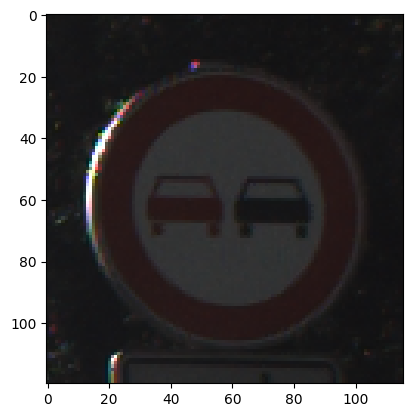

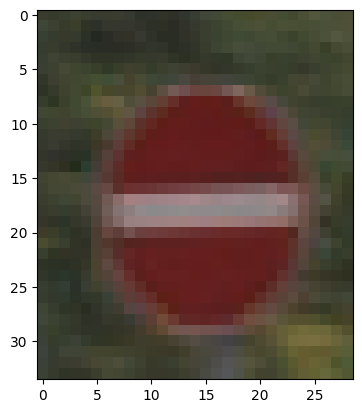

In [26]:
plt.imshow(plt.imread(r'/content/Test_Dataset/Dataset/00022.png'))
plt.show()

plt.imshow(plt.imread(r'/content/Test_Dataset/Dataset/00031.png'))
plt.show()


In [65]:
test_datagen = ImageDataGenerator(rescale=1./255)


test_gen=test_datagen.flow_from_directory('/content/Test_Dataset', target_size=(224, 224),class_mode='binary')

Found 12630 images belonging to 1 classes.


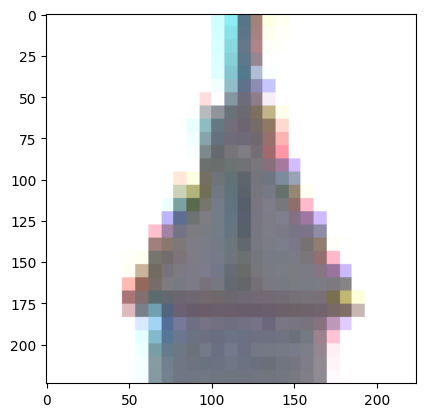

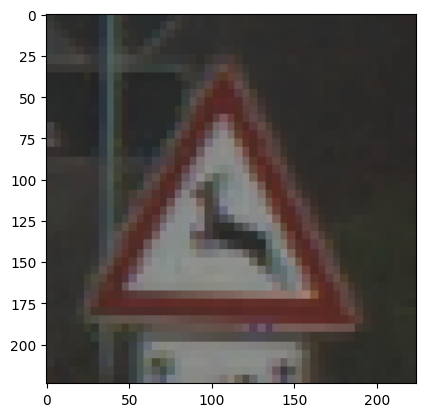

In [66]:
plt.imshow(test_gen[0][0][0])
plt.show()
plt.imshow(test_gen[0][0][9])
plt.show()

In [67]:
model.predict(test_gen)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step


array([[6.3513897e-07, 8.4628364e-06, 3.3765468e-06, ..., 1.2904875e-09,
        1.3825099e-06, 1.3853388e-09],
       [4.6755866e-07, 5.4994445e-07, 1.4879666e-05, ..., 2.3333186e-08,
        1.9574103e-05, 6.5153798e-09],
       [3.5592802e-08, 5.3087412e-10, 2.6766248e-08, ..., 9.9775440e-01,
        1.5302733e-11, 9.3250963e-10],
       ...,
       [5.5286446e-08, 2.4957974e-13, 9.7879448e-12, ..., 3.2498067e-06,
        9.3779483e-14, 5.2950111e-10],
       [1.1204640e-15, 4.1598546e-22, 3.3111662e-29, ..., 7.2316432e-22,
        1.5997569e-24, 5.8310290e-18],
       [1.7885956e-14, 9.7186920e-12, 2.6426446e-12, ..., 1.5717143e-12,
        6.0794886e-10, 6.3709414e-15]], dtype=float32)

## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━

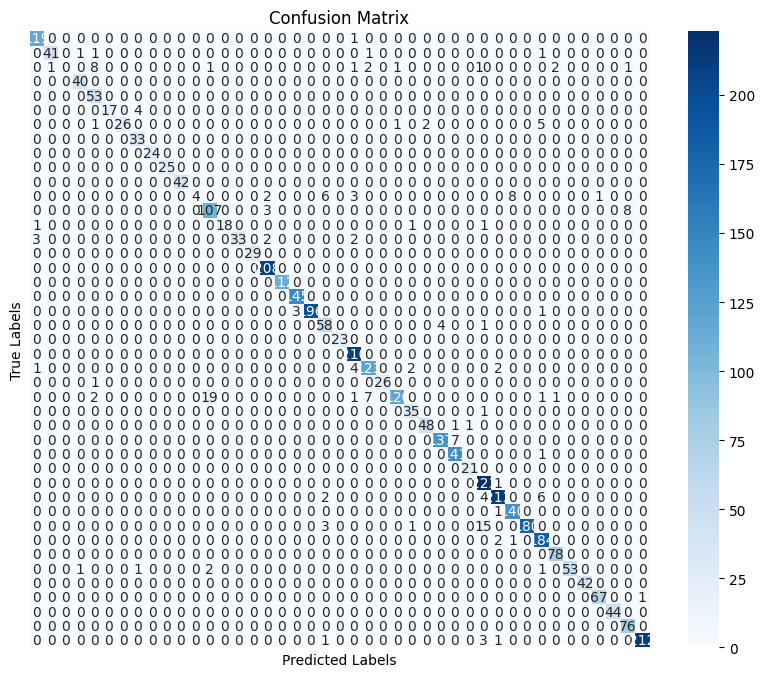

Classification Report:
                                precision    recall  f1-score   support

                   Ahead only       0.96      0.99      0.98       120
                Beware of ice       0.98      0.91      0.94        45
            Bicycles crossing       0.00      0.00      0.00        27
                   Bumpy road       0.95      1.00      0.98        40
            Children crossing       0.80      1.00      0.89        53
         Dangerous curve left       1.00      0.81      0.89        21
        Dangerous curve right       1.00      0.74      0.85        35
                 Double curve       0.87      1.00      0.93        33
End no passing veh > 3.5 tons       1.00      1.00      1.00        24
            End of no passing       1.00      1.00      1.00        25
     End of speed limit (80km       1.00      1.00      1.00        42
   End speed + passing limits       1.00      0.17      0.29        24
              General caution       0.83      0.91  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
true_labels = []
predicted_classes = []

for i in range(len(validation_generator)):
    images, labels = next(validation_generator)

    predictions = model.predict(images)

    predicted_classes_batch = np.argmax(predictions, axis=1)
    true_labels_batch = np.argmax(labels, axis=1)

    predicted_classes.extend(predicted_classes_batch)
    true_labels.extend(true_labels_batch)

predicted_classes = np.array(predicted_classes)
true_labels = np.array(true_labels)

conf_matrix = confusion_matrix(true_labels, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_generator.class_indices.keys()), yticklabels=list(test_generator.class_indices.keys()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(true_labels, predicted_classes, target_names=list(validation_generator.class_indices.keys()))
print("Classification Report:\n",class_report)


## Save the Model
Save the trained CNN model for submission.

In [73]:
model.save('task_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying traffic signs?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:


1.   i used image agmuntiton to  resize the data as the pics was so small and when i changed the size the imges apeared bigger and eiser to look at
2.  my model had input layer and five hiden layers and on output layer with soft max a found that this nmber of hidden layers and i preform 3,3 kernal mask and with thier asggine units had given me the best acurcy for te first 4 hidden lyers a preform maxpolling 2,2 after and dropout to prevent overfitting and i used arly stoping



3.   i used a relu actvition function for the the function abilty to return postive numbers

4.   i used adam for my optmizer as it would give me the best hyberparameter to give me the best accurcy and i assgihin epoch to 10 to try to find the best for my model  
5.   i used my loss function becuse the data is catagorical


6.   i used dropout as my technique for ot's ability to prevent overfitting



7.   i used model.evalute to see the accurcy of my model then i used cofuiton matreix and i preform visulaizeiton on it and i used classfiton report
as why did i iuse it conffuiton matrix wolud give me the ability to see what did the mode get wrong withe each catagoriy and the classfition report would give me and over view of my model preformence
8.   i used heat map to visulaize my confuition matrix to see how may model get the output and the counfiotion of each class

9.   first i implmented the model without dropout or callbacks and i encoter over fitting after i implemnet them the overfiting was gone








